# **Image Classification**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from sklearn.metrics import classification_report

from keras.datasets import fashion_mnist

from keras.layers import Dense, Input, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten,InputLayer,SpatialDropout2D,LSTM

from keras.models import Sequential, Model

from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.callbacks import TensorBoard

from keras.optimizers import RMSprop
from tensorflow.keras import layers
import tensorflow as tf
from keras import optimizers

# *Building data set*

*   image collection from online resources
*   labelling them


*   making an entire datset with image and labels
*   dividing the dataset into train, val,test datasets








In [ ]:
#saved npz files of train and test datasets
#having folders split into train,val,test folders
#have full folder of images labelled

#any of the files can be used according to the process we follow further

# we are using the entire dataset here

In [2]:
import os

base_dir='/content/drive/MyDrive/DATA/final_data'

# **Using basic CNN**

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Input(shape=(224,224,3)))
model.add(layers.Conv2D(64, kernel_size=(10,10), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(10,10), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

callback1 = ModelCheckpoint('/content/drive/MyDrive/DATA/final_model/model_cnn.pt', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
callaback2 = EarlyStopping(patience=15)
callback_list = [callback1, callaback2]

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 215, 215, 64)      19264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 107, 107, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 98, 98, 64)        409664    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               38416250  
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

data generation and 
fit with 50 epochs first

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,validation_split=0.2,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        base_dir,subset='training',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        base_dir,subset='validation',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 - 11s - loss: 1.7450 - acc: 0.2200 - val_loss: 1.6093 - val_acc: 0.2000

Epoch 00001: val_acc improved from -inf to 0.20000, saving model to /content/drive/MyDrive/DATA/final_model/model_cnn.pt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_cnn.pt/assets
Epoch 2/50
20/20 - 12s - loss: 1.6131 - acc: 0.2450 - val_loss: 1.6123 - val_acc: 0.2100

Epoch 00002: val_acc improved from 0.20000 to 0.21000, saving model to /content/drive/MyDrive/DATA/final_model/model_cnn.pt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_cnn.pt/assets
Epoch 3/50
20/20 - 10s - loss: 1.6138 - acc: 0.1600 - val_loss: 1.6094 - val_acc: 0.1600

Epoch 00003: val_acc did not improve from 0.21000
Epoch 4/50
20/20 - 9s - loss: 1.6062 - acc: 0.2400 - val_loss: 1.6073 - val_acc: 0.2300

Epoch 00004: val_acc improved from 0.21000 to 0.23000, saving model to /content/drive/MyDrive/DATA/final_model/model_cnn.pt
INFO:tensorflow:Assets written t

*with 100 epochs*

In [8]:
cnn_history_100 = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Epoch 1/100
20/20 - 5s - loss: 1.6158 - acc: 0.2500 - val_loss: 1.8291 - val_acc: 0.2200

Epoch 00001: val_acc improved from -inf to 0.22000, saving model to /content/drive/MyDrive/DATA/final_model/model_cnn.pt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_cnn.pt/assets
Epoch 2/100
20/20 - 4s - loss: 1.6258 - acc: 0.2600 - val_loss: 1.6305 - val_acc: 0.2500

Epoch 00002: val_acc improved from 0.22000 to 0.25000, saving model to /content/drive/MyDrive/DATA/final_model/model_cnn.pt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_cnn.pt/assets
Epoch 3/100
20/20 - 4s - loss: 1.5977 - acc: 0.2200 - val_loss: 1.6031 - val_acc: 0.2900

Epoch 00003: val_acc improved from 0.25000 to 0.29000, saving model to /content/drive/MyDrive/DATA/final_model/model_cnn.pt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_cnn.pt/assets
Epoch 4/100
20/20 - 4s - loss: 1.5959 - acc: 0.3000 - val_loss: 1.5911 - val

***metrics***

In [9]:
# for the metrics to be more good we are rerunning this piece of code with shuffle being false, as earlier if we dnt mention it takes it to be true

validation_generator = test_datagen.flow_from_directory(
        base_dir,
        subset='validation',
        target_size=(224, 224),
        seed=0,
        batch_size=1,
        shuffle=False,
        class_mode='categorical')

Found 500 images belonging to 5 classes.


In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# get the ground truth of your data. 
pred=validation_generator.classes 

# predict the probability distribution of the data
probabilities = model.predict(validation_generator, steps=500, verbose=1)

# get the class with highest probability for each sample
y_pred = np.argmax(probabilities, axis=-1)

# get the classification report
print(classification_report(pred, y_pred))

# get the confussion matrix
print(confusion_matrix(pred, y_pred))

500/500 [==============================] - 7s 12ms/step
              precision    recall  f1-score   support

           0       0.35      0.58      0.44       100
           1       0.40      0.30      0.34       100
           2       0.40      0.25      0.31       100
           3       0.42      0.60      0.50       100
           4       0.47      0.27      0.34       100

    accuracy                           0.40       500
   macro avg       0.41      0.40      0.39       500
weighted avg       0.41      0.40      0.39       500

[[58 19  7 13  3]
 [36 30  7 18  9]
 [35 11 25 24  5]
 [10  5 12 60 13]
 [25 10 11 27 27]]


# **ploting**

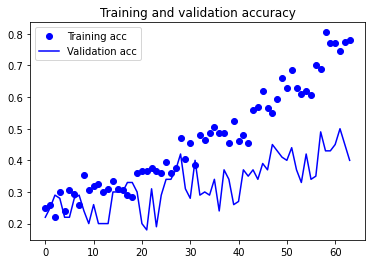

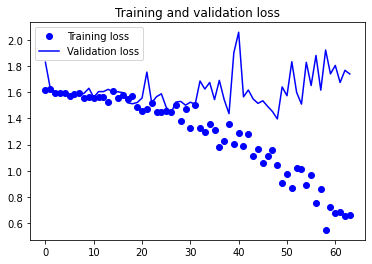

In [13]:
import matplotlib.pyplot as plt

acc = cnn_history_100.history['acc']
val_acc = cnn_history_100.history['val_acc']
loss = cnn_history_100.history['loss']
val_loss = cnn_history_100.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

***data augmentation and fit the model***

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator_aug = train_datagen_aug.flow_from_directory(
        # This is the target directory
        base_dir,subset='training',
        target_size=(224,224),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        base_dir,subset='validation',
        target_size=(224,224),
        batch_size=10,
        class_mode='categorical')


cnn_aug_history = model.fit(
      train_generator_aug,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/100
20/20 - 6s - loss: 1.3387 - acc: 0.4300 - val_loss: 1.2845 - val_acc: 0.4200

Epoch 00001: val_acc did not improve from 0.50000
Epoch 2/100
20/20 - 6s - loss: 1.2159 - acc: 0.4850 - val_loss: 1.3858 - val_acc: 0.4300

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/100
20/20 - 6s - loss: 1.2562 - acc: 0.4300 - val_loss: 1.3672 - val_acc: 0.3700

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/100
20/20 - 6s - loss: 1.1726 - acc: 0.5150 - val_loss: 1.5264 - val_acc: 0.4100

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/100
20/20 - 6s - loss: 1.1972 - acc: 0.5350 - val_loss: 1.4553 - val_acc: 0.3200

Epoch 00005: val_acc did not improve from 0.50000
Epoch 6/100
20/20 - 5s - loss: 1.3060 - acc: 0.3950 - val_loss: 1.2441 - val_acc: 0.4500

Epoch 00006: val_acc did not improve from 0.50000
Epoch 7/100
20/20 - 6s - loss: 1.2099 - acc: 0.5100 - val_loss: 1.3873 - val_

# **TRANSFER LEARNING USING RESNET**

In [17]:
from tensorflow.keras.applications import ResNet50

res_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

94773248/94765736 [==============================] - 1s 0us/step


In [18]:
res_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [19]:
res_base.trainable = False

In [21]:
model_res = models.Sequential()
model_res.add(layers.Input(shape=(224,224,3)))
model_res.add(res_base)
model_res.add(layers.Flatten())
model_res.add(layers.Dense(250, activation='relu'))
model_res.add(layers.Dense(5, activation='softmax'))

model_res.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

callback1 = ModelCheckpoint('/content/drive/MyDrive/DATA/final_model/model_res50.pt', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
callaback2 = EarlyStopping(patience=15)
callback_list = [callback1, callaback2]

model_res.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_1 (ModuleWrap (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 250)               25088250  
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 1255      
Total params: 48,677,217
Trainable params: 25,089,505
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
res_history = model_res.fit(
      train_generator_aug,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Epoch 1/100
20/20 - 10s - loss: 19.8204 - acc: 0.2250 - val_loss: 1.6096 - val_acc: 0.1900

Epoch 00001: val_acc improved from -inf to 0.19000, saving model to /content/drive/MyDrive/DATA/final_model/model_res50.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_res50.pt/assets
Epoch 2/100
20/20 - 7s - loss: 1.6744 - acc: 0.2550 - val_loss: 1.6097 - val_acc: 0.2100

Epoch 00002: val_acc improved from 0.19000 to 0.21000, saving model to /content/drive/MyDrive/DATA/final_model/model_res50.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_res50.pt/assets
Epoch 3/100
20/20 - 7s - loss: 1.6108 - acc: 0.2150 - val_loss: 1.6091 - val_acc: 0.1900

Epoch 00003: val_acc did not improve from 0.21000
Epoch 4/100
20/20 - 6s - loss: 1.6085 - acc: 0.2000 - val_loss: 1.6102 - val_acc: 0.2100

Epoch 00004: val_acc did not improve from 0.21000
Epoch 5/100
20/20 - 6s - loss: 1.6092 - acc: 0.2300 - val_loss: 1.6111 - val_acc: 0.1700

Epoch 00005: val_acc did not improve from 0.21000
Epoch 6/100
20/20 - 6s - loss: 1.6095 - acc: 0.2000 - val_loss: 1.6074 - val_acc: 0.2100

Epoch 00006: val_acc did not improve from 0.21000
Epoch 7/100
20/20 - 6s - loss: 1.6286 - acc: 0.1650 - val_loss: 1.6120 - val_acc: 0.2300

Epoch 00007: val_acc improved from 0.21000 to 0.23000, saving model to /content/drive/MyDrive/DATA/final_model/model_res50.pt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_res50.pt/assets
Epoch 8/100
20/20 - 6s - loss: 1.6121 - acc: 0.2150 - val_loss: 1.6089 - val_acc: 0.2100

Epoch 00008: val_acc did not improve from 0.23000
Epoch 9/100
20/20 - 5s - loss: 1.6141 - acc: 0.1800 - val_loss: 1.6138 - val_acc: 0.1300

Epoch 00009: val_acc did not improve from 0.23000
Epoch 10/100
20/20 - 6s - loss: 1.6306 - acc: 0.1750 - val_loss: 1.6099 - val_acc: 0.2200

Epoch 00010: val_acc did not improve from 0.23000
Epoch 11/100
20/20 - 6s - loss: 1.6138 - acc: 0.1900 - val_loss: 1.6139 - val_acc: 0.1200

Epoch 00011: val_acc did not improve from 0.23000
Epoch 12/100
20/20 - 6s - loss: 1.6105 - acc: 0.1750 - val_loss: 1.6100 - val_acc: 0.2000

Epoch 00012: val_acc did not improve from 0.23000
Epoch 13/100
20/20 - 6s - loss: 1.6154 - acc: 0.1700 - val_loss: 1.6074 - val_acc: 0.2700

Epoch 00013: val_acc improved from 0.23000 to 0.27000, saving model to /content/drive/MyDrive/DATA/final_mode

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_res50.pt/assets
Epoch 14/100
20/20 - 7s - loss: 1.6109 - acc: 0.1550 - val_loss: 1.6097 - val_acc: 0.2400

Epoch 00014: val_acc did not improve from 0.27000
Epoch 15/100
20/20 - 6s - loss: 1.6092 - acc: 0.1850 - val_loss: 1.6071 - val_acc: 0.2100

Epoch 00015: val_acc did not improve from 0.27000
Epoch 16/100
20/20 - 6s - loss: 1.6090 - acc: 0.2300 - val_loss: 1.6107 - val_acc: 0.2100

Epoch 00016: val_acc did not improve from 0.27000
Epoch 17/100
20/20 - 6s - loss: 1.6083 - acc: 0.1750 - val_loss: 1.6115 - val_acc: 0.1900

Epoch 00017: val_acc did not improve from 0.27000
Epoch 18/100
20/20 - 6s - loss: 1.6092 - acc: 0.2100 - val_loss: 1.6091 - val_acc: 0.2200

Epoch 00018: val_acc did not improve from 0.27000
Epoch 19/100
20/20 - 6s - loss: 1.6109 - acc: 0.1450 - val_loss: 1.6083 - val_acc: 0.2200

Epoch 00019: val_acc did not improve from 0.27000
Epoch 20/100
20/20 - 6s - loss: 1.6102 - acc: 0.2000 - va

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DATA/final_model/model_res50.pt/assets
Epoch 31/100
20/20 - 6s - loss: 1.6108 - acc: 0.1950 - val_loss: 1.6060 - val_acc: 0.2600

Epoch 00031: val_acc did not improve from 0.28000
Epoch 32/100
20/20 - 7s - loss: 1.6090 - acc: 0.2000 - val_loss: 1.6074 - val_acc: 0.2500

Epoch 00032: val_acc did not improve from 0.28000
Epoch 33/100
20/20 - 6s - loss: 1.6104 - acc: 0.1850 - val_loss: 1.6103 - val_acc: 0.2100

Epoch 00033: val_acc did not improve from 0.28000
Epoch 34/100
20/20 - 7s - loss: 1.6099 - acc: 0.2150 - val_loss: 1.6081 - val_acc: 0.2200

Epoch 00034: val_acc did not improve from 0.28000
Epoch 35/100
20/20 - 6s - loss: 1.6097 - acc: 0.1350 - val_loss: 1.6095 - val_acc: 0.1800

Epoch 00035: val_acc did not improve from 0.28000
Epoch 36/100
20/20 - 6s - loss: 1.6081 - acc: 0.2200 - val_loss: 1.6106 - val_acc: 0.1000

Epoch 00036: val_acc did not improve from 0.28000
Epoch 37/100
20/20 - 6s - loss: 1.6115 - acc: 0.1950 - va

***fine-tuning the model***

In [23]:
res_base.trainable = False
for layer in res_base.layers:
    if "conv5_block3" in layer.name:
        layer.trainable = True

In [24]:
res_historyft = model_res.fit(
      train_generator_aug,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

Epoch 1/100
20/20 - 6s - loss: 1.6101 - acc: 0.2100 - val_loss: 1.6095 - val_acc: 0.2000

Epoch 00001: val_acc did not improve from 0.28000
Epoch 2/100
20/20 - 6s - loss: 1.6093 - acc: 0.2300 - val_loss: 1.6083 - val_acc: 0.2600

Epoch 00002: val_acc did not improve from 0.28000
Epoch 3/100
20/20 - 6s - loss: 1.6095 - acc: 0.1750 - val_loss: 1.6086 - val_acc: 0.1900

Epoch 00003: val_acc did not improve from 0.28000
Epoch 4/100
20/20 - 7s - loss: 1.6098 - acc: 0.2000 - val_loss: 1.6102 - val_acc: 0.1300

Epoch 00004: val_acc did not improve from 0.28000
Epoch 5/100
20/20 - 6s - loss: 1.6084 - acc: 0.2600 - val_loss: 1.6099 - val_acc: 0.2000

Epoch 00005: val_acc did not improve from 0.28000
Epoch 6/100
20/20 - 6s - loss: 1.6097 - acc: 0.2050 - val_loss: 1.6074 - val_acc: 0.2700

Epoch 00006: val_acc did not improve from 0.28000
Epoch 7/100
20/20 - 6s - loss: 1.6094 - acc: 0.2150 - val_loss: 1.6083 - val_acc: 0.2400

Epoch 00007: val_acc did not improve from 0.28000
Epoch 8/100
20/20 - 

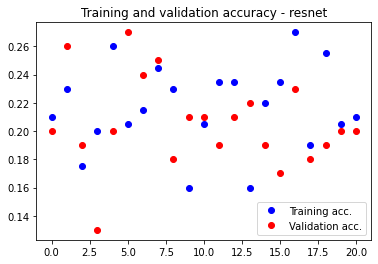

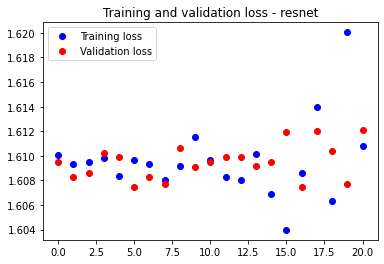

In [25]:
acc = res_historyft.history['acc']
val_acc = res_historyft.history['val_acc']
loss = res_historyft.history['loss']
val_loss = res_historyft.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'ro', label='Validation acc.')
plt.title('Training and validation accuracy - resnet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss - resnet')
plt.legend()

plt.show()

In [28]:
validation_generator = test_datagen.flow_from_directory(
        base_dir,
        subset='validation',
        target_size=(224, 224),
        batch_size=10,
        shuffle=False,
        class_mode='categorical')

Found 500 images belonging to 5 classes.


In [29]:
pred=validation_generator.classes 

# predict the probability distribution of the data
res_probabilities = model_res.predict(validation_generator, steps=500, verbose=1)

# get the class with highest probability for each sample
y_pred = np.argmax(res_probabilities, axis=-1)

# get the classification report
print(classification_report(pred, y_pred))

# get the confussion matrix
print(confusion_matrix(pred, y_pred))

500/500 [==============================] - 6s 11ms/step
              precision    recall  f1-score   support

           0       0.20      1.00      0.33       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100

    accuracy                           0.20       500
   macro avg       0.04      0.20      0.07       500
weighted avg       0.04      0.20      0.07       500

[[100   0   0   0   0]
 [100   0   0   0   0]
 [100   0   0   0   0]
 [100   0   0   0   0]
 [100   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
